In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import wikipedia
wiki_request = wikipedia.page('Python_(programming_language)')
wiki_request

<WikipediaPage 'Python (programming language)'>

In [4]:
text = wiki_request.content
text

'Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation. Its language constructs and object-oriented approach aim to help programmers write clear, logical code for small- and large-scale projects.Python is dynamically-typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming. It is often described as a "batteries included" language due to its comprehensive standard library.Guido van Rossum began working on Python in the late 1980s as a successor to the ABC programming language and first released it in 1991 as Python 0.9.0. Python 2.0 was released in 2000 and introduced new features such as list comprehensions, cycle-detecting garbage collection, reference counting, and Unicode support. Python 3.0, released in 2008, was a major revision that is not completely backward-compatible with ear

In [5]:
wikipedia.random(pages=10)

['New Houghton',
 'Angela Lambert',
 'Gesso',
 'Pikuach nefesh',
 'The Rose of Tralee (song)',
 'The Two Stars',
 '2009 UEFA European Under-21 Championship qualification Group 1',
 'Bisson',
 'Belgium in the Eurovision Song Contest 2004',
 'Jack Hubbert']

In [6]:
wikipedia.set_lang(prefix='de')

In [7]:
wikipedia.random(pages=10)

['Veľký Javorník (Javorník-Gebirge)',
 'Verwaltungsgemeinschaft Ohrdruf',
 'Jean-Jacques Régis de Cambacérès',
 'Rudolf Gräffer',
 'V(D)J-Rekombination',
 'Präsenilin sel-12',
 'Roland Merten',
 'Staubwedel',
 'Stockton',
 'Anton Ulrich']

In [8]:
wikipedia.set_lang(prefix='en')

In [9]:
def plot_wordcloud(wordcloud):
    plt.figure(figsize=(15, 10))
    plt.axis("off")
    plt.imshow(wordcloud) 
    plt.show()

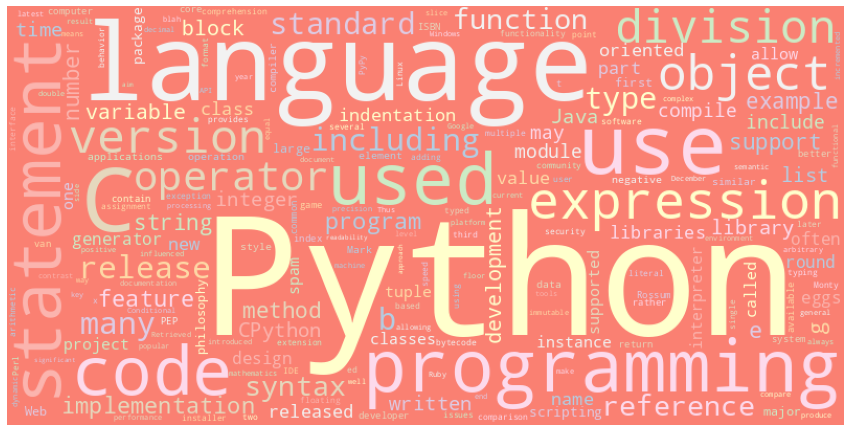

In [11]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 800, height = 400, 
                      background_color='salmon', colormap='Pastel1',
                      collocations = False, stopwords = STOPWORDS).generate(text)

plot_wordcloud(wordcloud)

In [12]:
wordcloud.to_file("wordcloud.png")

In [13]:
wikipedia.random(pages=10)

['Conus levistimpsoni',
 'Naka-ku, Hiroshima',
 'Uremic pruritus',
 'Dora West',
 'MSI Wind PC',
 'Works of Elizabeth Murray',
 'Malcolm Robertson (footballer)',
 'William Daniel (bishop)',
 'Theodore F. Payne House',
 'Oliver Ready']

In [14]:

text = wikipedia.page('Rising Star Academy')
text.content

'Rising Star Academy is a private Islamic day school for students in pre-K through twelfth grades, located in Union City, in Hudson County, New Jersey, United States, established in 2009.As of the 2015–16 school year, the school had an enrollment of 196 students (plus 14 in PreK) and 22.5 classroom teachers (on an FTE basis), for a student–teacher ratio of 8.7:1. The school\'s student body was 96.4% White, 2.0% Hispanic and 1.5% Black.\n\n\n== History ==\nRising Star Academy opened in September 2009 by the North Hudson Islamic Educational Center, a Sunni Muslim mosque established in 1992 in Union City. The mosque\'s 2,000-member congregation includes approximately 500 Latino converts from other religions, such as Catholicism.The school received accreditation from the Middle States Association of Colleges and Schools Commissions on Elementary and Secondary Schools in May 2016. The accreditation was effective December 2016 for a seven-year period.\n\n\n== References ==\n\n\n== External l

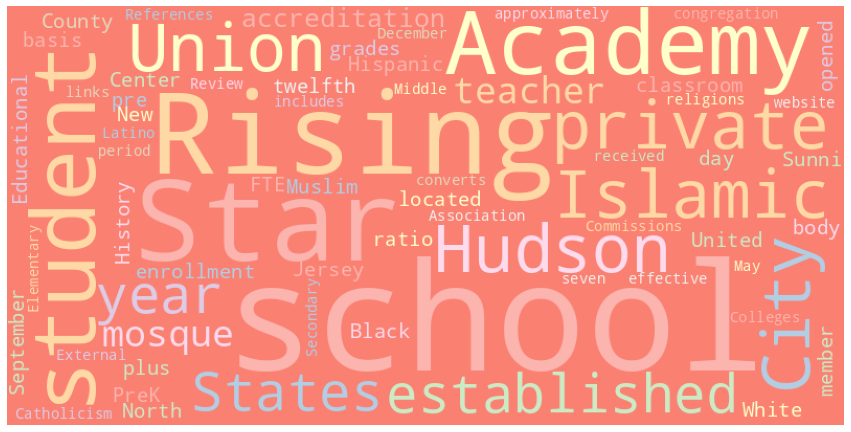

In [15]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 800, height = 400, 
                      background_color='salmon', colormap='Pastel1',
                      collocations = False, stopwords = STOPWORDS).generate(text.content)

plot_wordcloud(wordcloud)# write your code here to do a word cloud

In [16]:
txt = wikipedia.page('IPython').content

In [17]:
print(len(txt))

5184


In [22]:
import texthero as hero
txt = pd.Series(txt)
txt = hero.clean(txt)[0]


In [23]:
print(len(txt))

3984


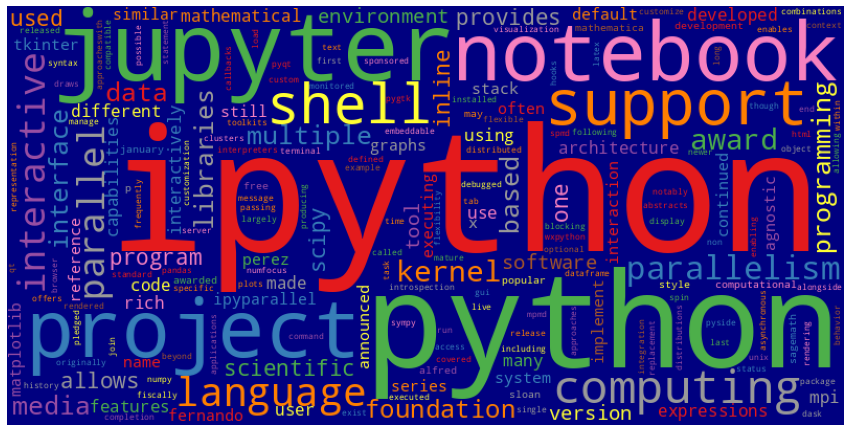

In [24]:
wordcloud = WordCloud(width = 800, height = 400, 
                      background_color='navy', colormap='Set1',
                      collocations = False, stopwords = STOPWORDS).generate(txt)

plot_wordcloud(wordcloud)

In [25]:
num_top_words = 10
txt_ser = pd.Series(txt)
hero.top_words(txt_ser)[:num_top_words]

ipython        28
python         17
jupyter        15
project         8
notebook        8
support         8
computing       7
parallelism     6
parallel        6
interactive     6
dtype: int64

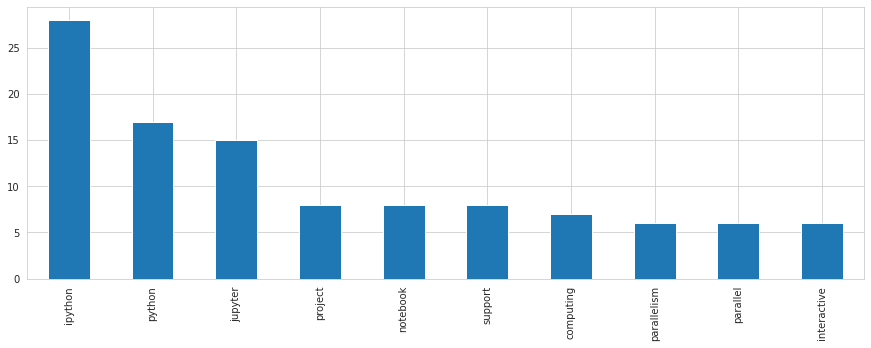

In [26]:
sns.set_style("whitegrid")
num_top_words = 10
txt_ser = pd.Series(txt)
plt.figure(figsize=(15,5))
hero.top_words(txt_ser)[:num_top_words].plot(kind='bar')
plt.show()

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/Code-Institute-Solutions/sample-datasets/main/imdb_reviews.csv")
df = df.sample(n=1000, random_state=1).reset_index(drop=True)
print(df.shape)
df.head()

(1000, 2)


,review,sentiment
0,A response to previous comments made by reside...,0
1,Hellraiser: Bloodline is where the sequel medi...,0
2,American Pie: Beta House is sort of in limbo b...,0
3,'The Shop Around the Corner (1940)' is a pleas...,1
4,"A friend of mine once rented this, thinking si...",0


In [28]:
df['review'] = hero.clean(df['review'])
df.head()

,review,sentiment
0,response previous comments made residents regi...,0
1,hellraiser bloodline sequel mediocrity hellrai...,0
2,american pie beta house sort limbo genres one ...,0
3,shop around corner pleasant romantic comedy so...,1
4,friend mine rented thinking since peter fonda ...,0


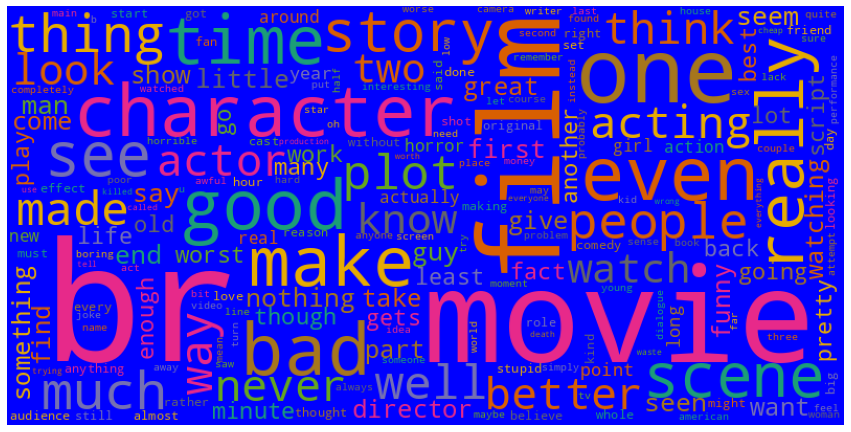

In [29]:
text = df.query("sentiment == 0")['review'].values
text = str(text)
wordcloud = WordCloud(width = 800, height = 400, 
                      background_color='blue', colormap='Dark2',
                      collocations = False, stopwords = STOPWORDS).generate(text)

plot_wordcloud(wordcloud)

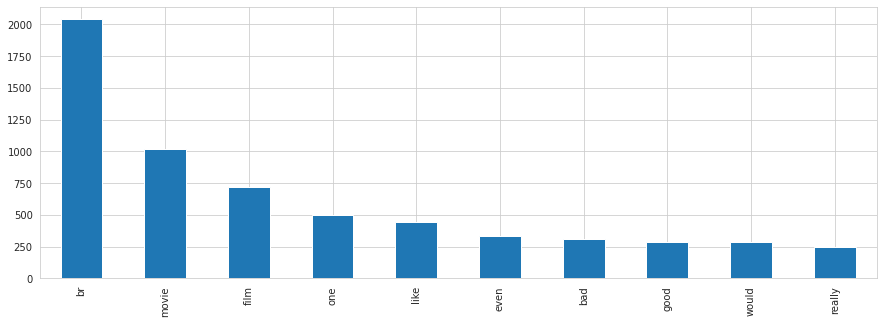

In [30]:
sns.set_style("whitegrid")
num_top_words= 10
txt_ser = pd.Series(text)
plt.figure(figsize=(15,5))
hero.top_words(txt_ser)[:num_top_words].plot(kind='bar')
plt.show()

In [31]:
def remove_specific_characters(txt):
  for x in ['\n','/><br','<br', 'br', '/><br', '/>']:
    txt = txt.replace(x, ' ')
  return txt

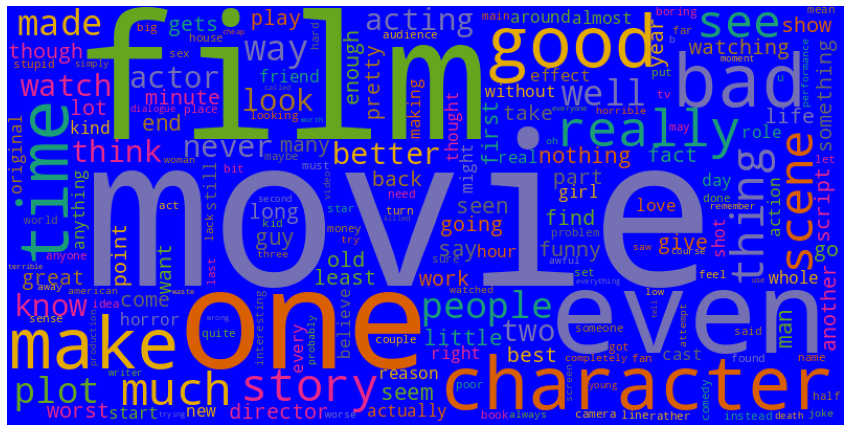

In [32]:
text = df.query("sentiment == 0")['review'].values
text = str(text)
text = remove_specific_characters(text)  # remove remove_specific_characters()
wordcloud = WordCloud(width = 800, height = 400, 
                      background_color='blue', colormap='Dark2',
                      collocations = False, stopwords = STOPWORDS).generate(text)

plot_wordcloud(wordcloud)

In [33]:
def remove_specific_words(txt):
  for x in ['\n','/><br','<br', 'br', '/><br', '/>']:
    txt = txt.replace(x, ' ')
  return txt

def plot_top_words(text, num_top_words=10):
  sns.set_style("whitegrid")
  txt_ser = pd.Series(text)
  plt.figure(figsize=(15,5))
  hero.top_words(txt_ser)[:num_top_words].plot(kind='bar')
  plt.show()


def wordplot_from_data_frame(df, cohort_variable, text_variable):
  """
  logic:
  - loops over levels of a categorical variable
  - for each level, subsets the data, process it, and createa a 
  wordcloud and bar plot with most frequent words

  """
  cohort_levels = df[cohort_variable].unique()

  for level in cohort_levels:
    
    text = df[str(text_variable)].loc[df[str(cohort_variable)]==level].values
    text = str(text)
    text = remove_specific_words(text)

    wordcloud = WordCloud(width = 800, height = 400, 
                      background_color='navy', colormap='Dark2',
                      collocations = False, stopwords = STOPWORDS).generate(str(text))
    print(f"=== {cohort_variable} : {level} ===")
    plot_wordcloud(wordcloud)
    print("\n")
    plot_top_words(text, num_top_words=10)
    print("\n\n")


=== sentiment : 0 ===


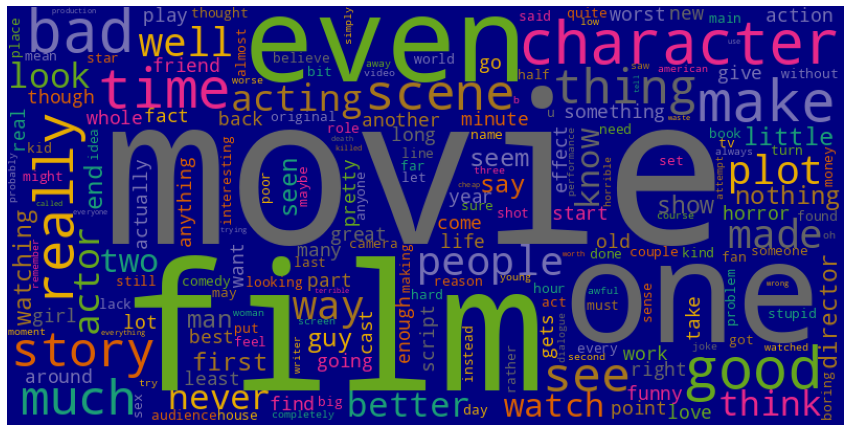

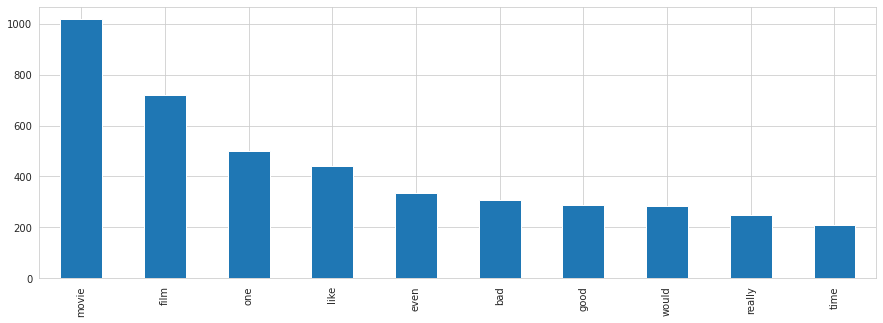




=== sentiment : 1 ===


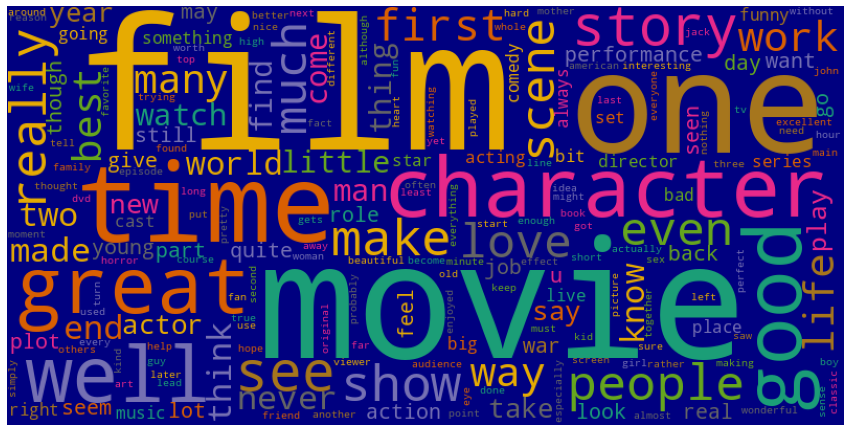

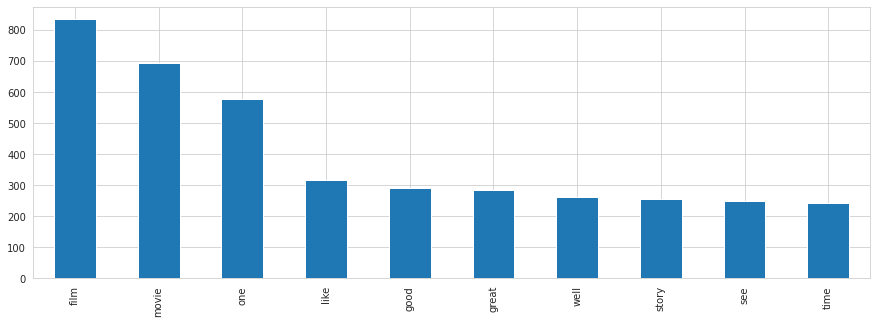

In [34]:
wordplot_from_data_frame(df, cohort_variable='sentiment', text_variable='review')